# Objective

# Collecting the data

In [607]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings("ignore")

In [608]:
df=pd.read_csv(r"D:\Board Infinity\ML_Project\spaceship-titanic\train.csv")
test=pd.read_csv(r"D:\Board Infinity\ML_Project\spaceship-titanic\test.csv")
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [609]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

# Analyzing the data

In [610]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [611]:
df['CryoSleep'].unique()

array([False, True, nan], dtype=object)

<AxesSubplot:>

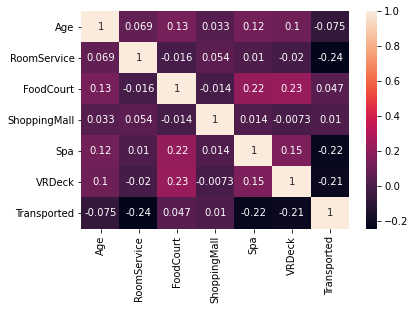

In [612]:
#finding the relation between the all the attributes of the dataset
sns.heatmap(df.corr(),annot=True)

(array([ 591.,  649., 2089., 1976., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

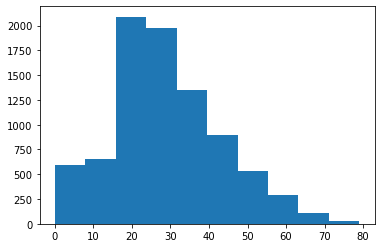

In [613]:
#Finding the age distribution in the dataset
plt.hist(df['Age'])

In [614]:
#so the most of the people are of 20 year of age in the dataset

In [615]:
import pandas_profiling 
from pandas_profiling import ProfileReport

In [616]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [617]:
numeric=df._get_numeric_data().columns.to_list()

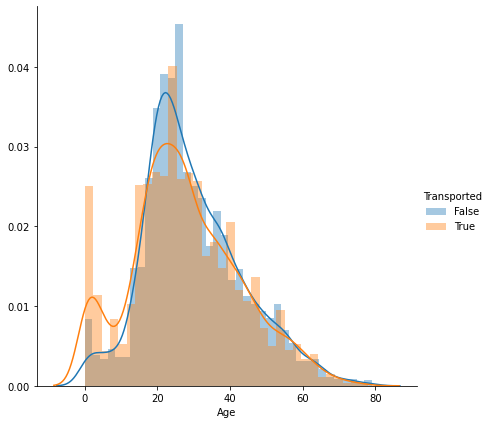

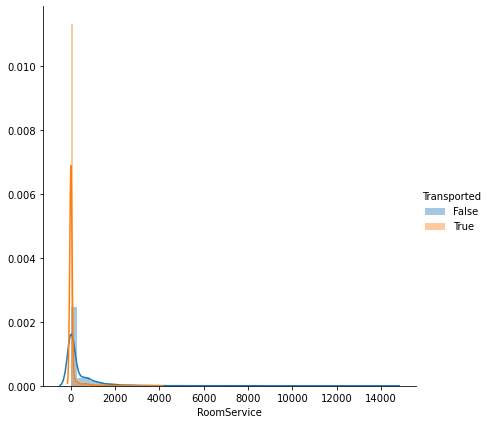

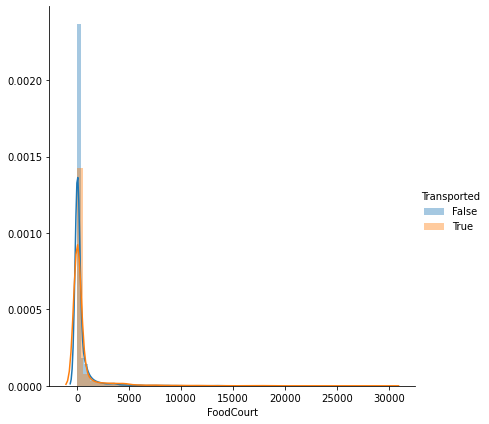

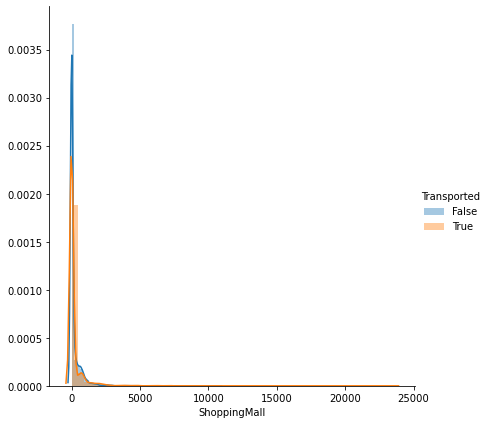

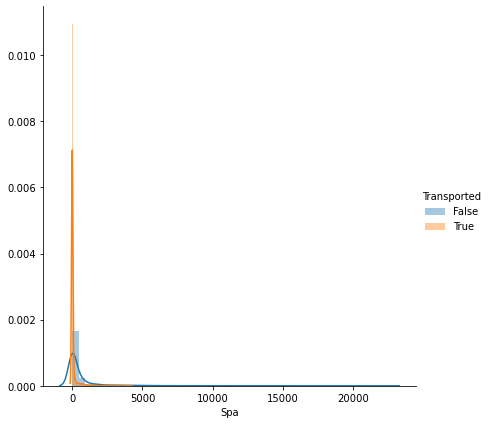

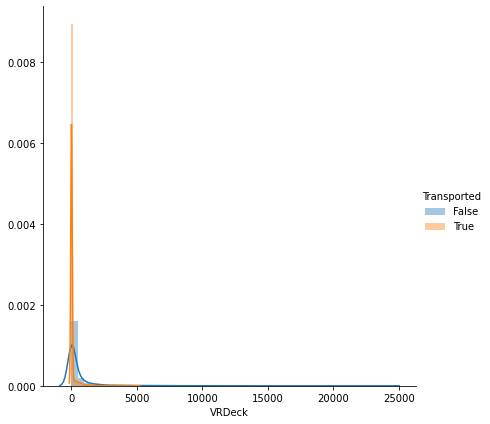

In [618]:
for i in numeric:
    if i != 'Transported':
        sns.FacetGrid(df, hue='Transported', height=6).map(sns.distplot,i).add_legend()

# Data Wrangling

In [619]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [620]:
#finding out missing values
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [621]:
#dropping all the null values
df["Age"].fillna(df["Age"].mean(), inplace = True)

In [622]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [623]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [624]:
data_type={'Age':'int32'}
df=df.astype(data_type)

In [625]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age               int32
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [626]:
df['Age_group']=pd.cut(x=df['Age'],bins=[-1,18,40,65,100],labels=['Child','Young Child','Middle Age','Pensioner'])

In [627]:
df['Room_Service']=pd.cut(x=df['RoomService'],bins=[-1,2000,8000,12000],labels=['low','mid','high'])

In [628]:
df['Food_court']=pd.cut(x=df['FoodCourt'],bins=[-1,5000,20000,30000],labels=['low','mid','high'])

In [629]:
df['Shopping_Mall']=pd.cut(x=df['ShoppingMall'],bins=[-1,2000,8000,12000],labels=['low','mid','high'])

In [630]:
df['Spa_group']=pd.cut(x=df['Spa'],bins=[-1,5000,15000,23000],labels=['low','mid','high'])

In [631]:
df['VR_Desk']=pd.cut(x=df['VRDeck'],bins=[-1,5000,15000,23000],labels=['low','mid','high'])

In [632]:
#deleting all the null vlaues from the dataset
df=df.dropna()

In [633]:
df.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name             0
Transported      0
Age_group        0
Room_Service     0
Food_court       0
Shopping_Mall    0
Spa_group        0
VR_Desk          0
dtype: int64

In [634]:
#Deleting all the non important features from the dataset 
df = df.drop(labels=["PassengerId","Cabin","Spa","Name","Age","RoomService","FoodCourt","ShoppingMall","VRDeck"],axis=1)

In [635]:
df.head()

HomePlanet CryoSleep  Destination    VIP  Transported    Age_group  \
0     Europa     False  TRAPPIST-1e  False        False  Young Child   
1      Earth     False  TRAPPIST-1e  False         True  Young Child   
2     Europa     False  TRAPPIST-1e   True        False   Middle Age   
3     Europa     False  TRAPPIST-1e  False        False  Young Child   
4      Earth     False  TRAPPIST-1e  False         True        Child   

  Room_Service Food_court Shopping_Mall Spa_group VR_Desk  
0          low        low           low       low     low  
1          low        low           low       low     low  
2          low        low           low       mid     low  
3          low        low           low       low     low  
4          low        low           low       low     low

In [636]:
from sklearn.preprocessing import LabelEncoder

In [637]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [638]:
df['VIP'].unique()

array([False, True], dtype=object)

In [639]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [640]:
df['CryoSleep'].unique()

array([False, True], dtype=object)

In [641]:
df['Age_group'].unique()

['Young Child', 'Middle Age', 'Child', 'Pensioner']
Categories (4, object): ['Child' < 'Young Child' < 'Middle Age' < 'Pensioner']

In [642]:
df['Room_Service'].unique()

['low', 'mid', 'high']
Categories (3, object): ['low' < 'mid' < 'high']

In [643]:
df['Food_court'].unique()

['low', 'mid', 'high']
Categories (3, object): ['low' < 'mid' < 'high']

In [644]:
df['Shopping_Mall'].unique()

['low', 'mid', 'high']
Categories (3, object): ['low' < 'mid' < 'high']

In [645]:
df['Spa_group'].unique()

['low', 'mid', 'high']
Categories (3, object): ['low' < 'mid' < 'high']

In [646]:
df['VR_Desk'].unique()

['low', 'mid', 'high']
Categories (3, object): ['low' < 'mid' < 'high']

In [647]:
from sklearn import preprocessing

In [648]:
label_encoder = preprocessing.LabelEncoder()
 
# Encoding the labels in columns
df['HomePlanet']= label_encoder.fit_transform(df['HomePlanet'])
df['VIP']= label_encoder.fit_transform(df['VIP'])
df['Destination']= label_encoder.fit_transform(df['Destination'])
df['CryoSleep']= label_encoder.fit_transform(df['CryoSleep'])
df['Age_group']= label_encoder.fit_transform(df['Age_group'])
df['Room_Service']= label_encoder.fit_transform(df['Room_Service'])
df['Food_court']= label_encoder.fit_transform(df['Food_court'])
df['Shopping_Mall']= label_encoder.fit_transform(df['Shopping_Mall'])
df['Spa_group']= label_encoder.fit_transform(df['Spa_group'])
df['VR_Desk']= label_encoder.fit_transform(df['VR_Desk'])
df['Transported']= label_encoder.fit_transform(df['Transported'])

In [649]:
df.head()

HomePlanet  CryoSleep  Destination  VIP  Transported  Age_group  \
0           1          0            2    0            0          3   
1           0          0            2    0            1          3   
2           1          0            2    1            0          1   
3           1          0            2    0            0          3   
4           0          0            2    0            1          0   

   Room_Service  Food_court  Shopping_Mall  Spa_group  VR_Desk  
0             1           1              1          1        1  
1             1           1              1          1        1  
2             1           1              1          2        1  
3             1           1              1          1        1  
4             1           1              1          1        1

# Train & Test

In [650]:
X = df.loc[:,df.columns!='Transported']

In [651]:
X.head()

HomePlanet  CryoSleep  Destination  VIP  Age_group  Room_Service  \
0           1          0            2    0          3             1   
1           0          0            2    0          3             1   
2           1          0            2    1          1             1   
3           1          0            2    0          3             1   
4           0          0            2    0          0             1   

   Food_court  Shopping_Mall  Spa_group  VR_Desk  
0           1              1          1        1  
1           1              1          1        1  
2           1              1          2        1  
3           1              1          1        1  
4           1              1          1        1

In [652]:
y = df['Transported']

In [653]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [654]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)
X_train.shape, y_train.shape

((4729, 10), (4729,))

In [655]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.fit_transform(X_test)

array([[ 0.44033462,  1.33866016,  0.62500451, ..., -0.11502952,
        -0.10270928, -0.07797537],
       [ 0.44033462, -0.74701558,  0.62500451, ...,  7.65713204,
        -0.10270928, -0.07797537],
       [-0.81856281,  1.33866016,  0.62500451, ..., -0.11502952,
        -0.10270928, -0.07797537],
       ...,
       [-0.81856281,  1.33866016, -0.60737306, ..., -0.11502952,
        -0.10270928, -0.07797537],
       [ 1.69923205, -0.74701558,  0.62500451, ..., -0.11502952,
        -0.10270928, -0.07797537],
       [-0.81856281, -0.74701558, -0.60737306, ..., -0.11502952,
        -0.10270928, -0.07797537]])

# Models Building

In [656]:
#So here we will going to make some model with our data and choose the best one according to the accuracy

In [657]:
#First is Logistic Regression

In [658]:
from sklearn.linear_model import LogisticRegression

In [659]:
lr=LogisticRegression()

In [660]:
lr.fit(X_train,y_train)

LogisticRegression()

In [661]:
pred=lr.predict(X_test)

In [662]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [663]:
print('Accuracy: ',accuracy_score(y_test, pred))
print('\nClassification Report\n')
print(classification_report(y_test, pred))
print('\nConfusion_matrix\n')
print(confusion_matrix(y_test, pred))

Accuracy:  0.7286630488406513

Classification Report

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       988
           1       0.80      0.62      0.70      1039

    accuracy                           0.73      2027
   macro avg       0.74      0.73      0.73      2027
weighted avg       0.74      0.73      0.73      2027


Confusion_matrix

[[828 160]
 [390 649]]


In [664]:
#Second is Random Forest Classifier

In [665]:
from sklearn.ensemble import RandomForestClassifier

In [666]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)

In [667]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 594 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [668]:
# checking the oob score
classifier_rf.oob_score_

0.7439204905899768

In [669]:
pred_rf=classifier_rf.predict(X_test)

In [670]:
print('Accuracy: ',accuracy_score(y_test, pred_rf))
print('\nClassification Report\n')
print(classification_report(y_test, pred_rf))
print('\nConfusion_matrix\n')
print(confusion_matrix(y_test, pred_rf))

Accuracy:  0.7281697089294524

Classification Report

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       988
           1       0.81      0.62      0.70      1039

    accuracy                           0.73      2027
   macro avg       0.74      0.73      0.73      2027
weighted avg       0.74      0.73      0.73      2027


Confusion_matrix

[[834 154]
 [397 642]]


# Using test data

In [671]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [672]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [673]:
test["Age"].fillna(test["Age"].mean(), inplace = True)
data_type={'Age':'int32'}
test=test.astype(data_type)
test['Age_group']=pd.cut(x=test['Age'],bins=[-1,18,40,65,100],labels=['Child','Young Child','Middle Age','Pensioner'])
test['Room_Service']=pd.cut(x=test['RoomService'],bins=[-1,2000,8000,12000],labels=['low','mid','high'])
test['Food_court']=pd.cut(x=test['FoodCourt'],bins=[-1,5000,20000,30000],labels=['low','mid','high'])
test['Shopping_Mall']=pd.cut(x=test['ShoppingMall'],bins=[-1,2000,8000,12000],labels=['low','mid','high'])
test['Spa_group']=pd.cut(x=test['Spa'],bins=[-1,5000,15000,23000],labels=['low','mid','high'])
test['VR_Desk']=pd.cut(x=test['VRDeck'],bins=[-1,5000,15000,23000],labels=['low','mid','high'])
test=test.dropna()
test_new = test.copy(deep=True)
test_new= test_new.drop(labels=["PassengerId","Cabin","Spa","Name","Age","RoomService","FoodCourt","ShoppingMall","VRDeck"],axis=1)

In [674]:
test_new['HomePlanet']= label_encoder.fit_transform(test_new['HomePlanet'])
test_new['VIP']= label_encoder.fit_transform(test_new['VIP'])
test_new['Destination']= label_encoder.fit_transform(test_new['Destination'])
test_new['CryoSleep']= label_encoder.fit_transform(test_new['CryoSleep'])
test_new['Age_group']= label_encoder.fit_transform(test_new['Age_group'])
test_new['Room_Service']= label_encoder.fit_transform(test_new['Room_Service'])
test_new['Food_court']= label_encoder.fit_transform(test_new['Food_court'])
test_new['Shopping_Mall']= label_encoder.fit_transform(test_new['Shopping_Mall'])
test_new['Spa_group']= label_encoder.fit_transform(test_new['Spa_group'])
test_new['VR_Desk']= label_encoder.fit_transform(test_new['VR_Desk'])

In [675]:
test_new.head()

HomePlanet  CryoSleep  Destination  VIP  Age_group  Room_Service  \
0           0          1            2    0          3             1   
1           0          0            2    0          3             1   
2           1          1            0    0          3             1   
3           1          0            2    0          3             1   
4           0          0            2    0          3             1   

   Food_court  Shopping_Mall  Spa_group  VR_Desk  
0           1              1          1        1  
1           1              1          1        1  
2           1              1          1        1  
3           2              1          1        1  
4           1              1          1        1

In [677]:
test_pred=lr.predict(test_new)

In [678]:
submission=pd.DataFrame({"PassengerId":test["PassengerId"],"Transported":test_pred})

In [679]:
submission.to_csv("Spaceship_Titanic_Submission",index=False)